In [1]:
import cirq
import random
import numpy as np
from matplotlib import pyplot as plt
import scipy
import scipy.special

In [2]:
# Defines all of the necessary parameters

N = 50    # Defines the total number of steps our walker will take
pr = 0.5  # Defines the probability of our walker stepping to the right
i = 0     # Defines the initial position of our walker

def random_walk(pr, N, i):

    position = i

    # Repeatedly queries our random variable and moves our walker for the specified number of steps

    for j in range(N):

        coin_flip = list(np.random.choice(2, 1, p=[1-pr, pr])) # Flips our weighted coin
        position += 2*coin_flip[0]-1 # Moves our walker according to the coin flip 

    return position

print("The walker is located at: x = {var}".format(var = random_walk(pr, N, i)))

The walker is located at: x = 8


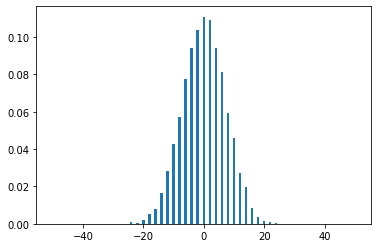

In [3]:
def dist(runs, N):

    positions = range(-1*N, N+1)
    instances = [0 for i in range(-1*N, N+1)]

    for k in range(runs):

        result = random_walk(pr, N, i)
        instances[positions.index(result)] += 1

    plt.bar(positions, [n/runs for n in instances])
    plt.show()

dist(10000, N)

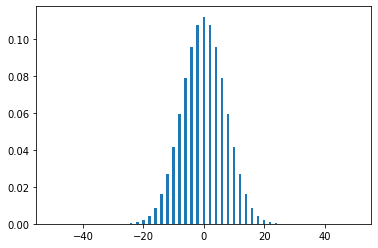

In [4]:
def height_calculate(x, N, pr):

    a = (N + x)/2
    b = (N - x)/2

    if (x%2 == 0):
        var = scipy.special.binom(N, a)*(pr**a)*((1-pr)**b)
    else:
        var = 0
    return var

positions = range(-1*N, N+1)
heights = [height_calculate(x, N, pr) for x in positions]
plt.bar(positions, heights)
plt.show()

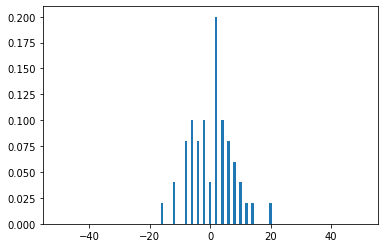

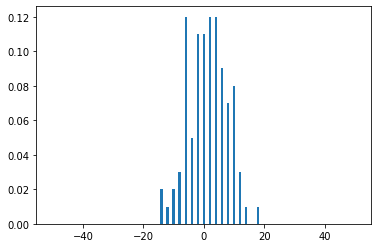

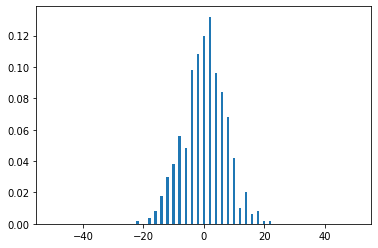

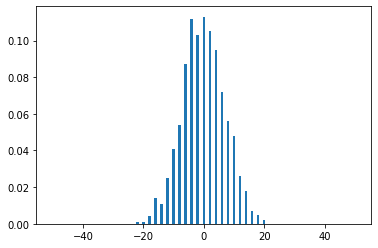

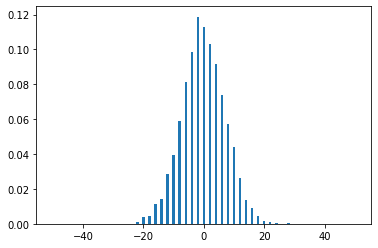

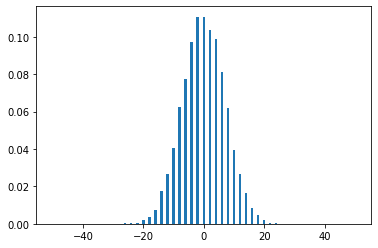

In [5]:
run_range = [50, 100, 500, 1000, 5000, 10000]
for run in run_range:
    dist(run, N)

In [6]:
number_qubits = 7
qubits = cirq.GridQubit.rect(1, number_qubits)

print(qubits)

[cirq.GridQubit(0, 0), cirq.GridQubit(0, 1), cirq.GridQubit(0, 2), cirq.GridQubit(0, 3), cirq.GridQubit(0, 4), cirq.GridQubit(0, 5), cirq.GridQubit(0, 6)]


In [7]:
def initial_state():

    yield cirq.X.on(cirq.GridQubit(0, 1))
    yield cirq.X.on(cirq.GridQubit(0, number_qubits))

In [8]:
def walk_step():

    # "Flip" the coin vector

    yield cirq.H.on(cirq.GridQubit(0, number_qubits))

    # Implement the Addition Operator

    yield cirq.X.on(cirq.GridQubit(0, number_qubits))

    for i in range(number_qubits, 0, -1):

        controls = [cirq.GridQubit(0, v) for v in range(number_qubits, i-1, -1)]
        yield cirq.X.on(cirq.GridQubit(0, i-1)).controlled_by(*controls)
        if (i > 1):
            yield cirq.X.on(cirq.GridQubit(0, i-1))

    yield cirq.X.on(cirq.GridQubit(0, number_qubits))

    # Implement the Substraction Operator

    for i in range(1, number_qubits+1):

        controls = [cirq.GridQubit(0, v) for v in range(number_qubits, i-1, -1)]
        yield cirq.X.on(cirq.GridQubit(0, i-1)).controlled_by(*controls)
        if (i < number_qubits):
            yield cirq.X.on(cirq.GridQubit(0, i))

In [9]:
number_qubits = 7
iterator = 30
sample_number = 5000

def generate_walk(number_qubits, iterator, sample_number):

    circuit = cirq.Circuit()

    circuit.append(initial_state())
    for j in range(iterator):
        circuit.append(walk_step())
    circuit.append(cirq.measure(*qubits, key='x'))

    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=sample_number)
    final = result.histogram(key='x')

    return final

final = generate_walk(number_qubits, iterator, sample_number)
print(final)

Counter({12: 1149, 14: 660, 20: 352, 10: 344, 16: 277, 52: 270, 18: 228, 48: 164, 54: 149, 22: 130, 28: 129, 30: 126, 38: 121, 40: 118, 42: 114, 32: 108, 34: 105, 26: 104, 24: 92, 36: 81, 44: 69, 46: 50, 50: 27, 8: 23, 56: 8, 58: 1, 6: 1})


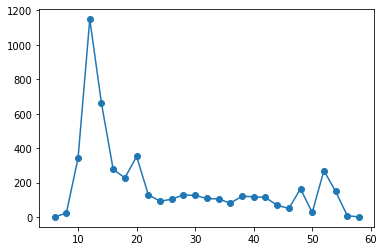

In [10]:
def graph(final):

    x_arr = list(final.keys())
    y_arr = [dict(final)[j] for j in dict(final).keys()]

    x_arr_final = []
    y_arr_final = []

    while (len(x_arr) > 0):

        x_arr_final.append(min(x_arr))
        y_arr_final.append(y_arr[x_arr.index(min(x_arr))])
        holder = x_arr.index(min(x_arr))
        del x_arr[holder]
        del y_arr[holder]

    plt.plot(x_arr_final, y_arr_final)
    plt.scatter(x_arr_final, y_arr_final)
    plt.show()

graph(final)

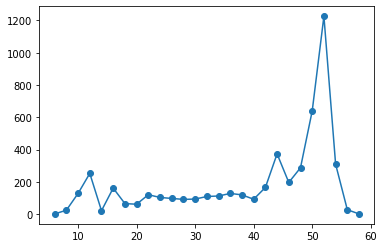

In [11]:
def initial_state():

    yield cirq.X.on(cirq.GridQubit(0, 1))

final = generate_walk(number_qubits, iterator, sample_number)
graph(final)

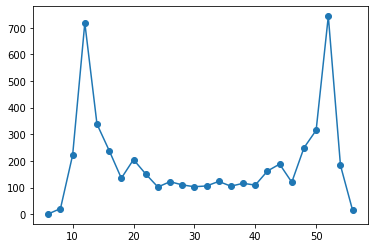

In [12]:
def initial_state():

    yield cirq.X.on(cirq.GridQubit(0, 1))

    yield cirq.H.on(cirq.GridQubit(0, number_qubits))
    yield cirq.S.on(cirq.GridQubit(0, number_qubits))

final = generate_walk(number_qubits, iterator, sample_number)
graph(final)